<a href="https://colab.research.google.com/github/HarshalRaut16/deep_learning_evaluation/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TASK 1 🧑🏽‍💻

Fit your model to this equation (30 Points)

> y = 4*(x^3) + 2*x + 150

* use Tensorflow as Deep learning Library 🧾
* Try to minimize size of the model 💪🏽

In [2]:
#import all essential libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create x values
np_x = tf.range(0, 500, 1)

In [4]:
# create y value
np_y = 4*(np_x**3) + 2*np_x + 150

In [5]:
# Convert into tensor
x = tf.convert_to_tensor(np_x)
y = tf.convert_to_tensor(np_y)

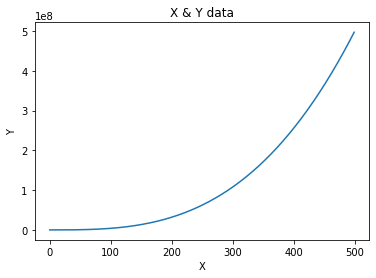

In [6]:
# plot x and y value to check data 
plt.plot(x, y)
plt.xlabel("X")  # add X-axis label
plt.ylabel("Y")  # add Y-axis label
plt.title("X & Y data")  # add title
plt.show();

In [7]:
# Split data into train and test sets
X_train = x[:400] # (80% of data)
y_train = y[:400]

X_test = x[400:] #  (20% of data)
y_test = y[400:]

len(X_train), len(X_test), len(y_train), len(y_test)

(400, 100, 400, 100)

In [8]:
# Normalized Train Data
x_train_norm = X_train/max(x)
y_train_norm = y_train/max(y)

In [9]:
# Normalized Test Data
x_test_norm = X_test/max(x)
y_test_norm = y_test/max(y)

In [10]:
# Assigning Max of x & y to variables beacause we need to get original data back by multiplying
max_x = np.max(x)
max_y = np.max(y)

## Setting up callbacks

In [11]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Creating Base Model

In [12]:
# base model
tf.random.set_seed(42)

# Create the model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# Compile the model
model_0.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# Fit the model
model_0.fit(tf.expand_dims(x_train_norm,axis=-1),y_train_norm, epochs=100,
            callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                  # Track logs under different experiment name
                                                  experiment_name="Task_1_base_model")])

Saving TensorBoard log files to: tensorflow_hub/Task_1_base_model/20230323-052548
Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.5635 - mae: 0.5635
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4251 - mae: 0.4251
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3341 - mae: 0.3341
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2874 - mae: 0.2874
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2658 - mae: 0.2658
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2516 - mae: 0.2516
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2377 - mae: 0.2377
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2229 - mae: 0.2229
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2073 - mae: 0.2073
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss

In [13]:
# evaluate model using normal data
model_0.evaluate(X_train,y_train)

13/13 [==============================] - 0s 1ms/step - loss: 63680844.0000 - mae: 63680844.0000


[63680844.0, 63680844.0]

In [14]:
# evaluate model using normalized data
model_0.evaluate(x_test_norm,y_test_norm)

4/4 [==============================] - 0s 2ms/step - loss: 0.3663 - mae: 0.3663


[0.3663448989391327, 0.3663448989391327]

In [15]:
# get predicted values
y_preds_norm_0 = model_0.predict(x_test_norm)

4/4 [==============================] - 0s 2ms/step


In [16]:
# multiply data by max values to get original data
y_preds_0 = tf.math.multiply(y_preds_norm_0,max_y)

In [17]:
# function for plot a graph of preduction

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds_0):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.plot(train_data, train_labels, c="r", label="Training data")
  # Plot test data in green
  plt.plot(test_data, test_labels, c="b", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.plot(test_data, predictions, c="y", label="Predictions",linestyle="--")
  # Show the legend
  plt.legend();
     

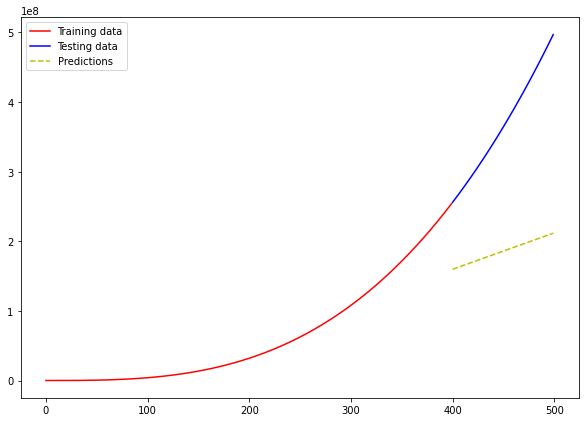

In [18]:
# plot graph of prediction
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_0)

## Model 1 (Improve model)

In [19]:
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=[1]),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
],name="model_1")

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(x_train_norm,axis=-1),y_train_norm, epochs=500,
            callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                  # Track logs under different experiment name
                                                  experiment_name="Task_1_model1")])

Saving TensorBoard log files to: tensorflow_hub/Task_1_model1/20230323-052615
Epoch 1/500
13/13 [==============================] - 1s 2ms/step - loss: 0.0673 - mae: 0.0673
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0341 - mae: 0.0341
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0162 - mae: 0.0162
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0078 - mae: 0.0078
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0050 - mae: 0.0050
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0047 - mae: 0.0047
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0039 - mae: 0.0039
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0038
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0033 - mae: 0.0033
Epoch 10/500
13/13 [==============================] - 0s 1ms/step - loss: 0.

In [20]:
y_preds_normalized_1 = model_1.predict(x_test_norm)
y_preds_1 = tf.math.multiply(y_preds_normalized_1,max_y)

4/4 [==============================] - 0s 2ms/step


In [21]:
# evaluate model using normalized data
model_1.evaluate(x_test_norm,y_test_norm)

4/4 [==============================] - 0s 2ms/step - loss: 0.0599 - mae: 0.0599


[0.059890683740377426, 0.059890683740377426]

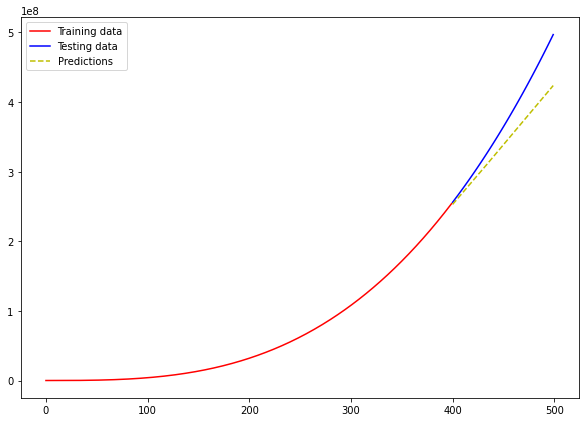

In [22]:
# plot graph
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_1)

## Model 2

In [23]:
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='gelu',input_shape=[1]), # using gelu activation function (https://www.tensorflow.org/api_docs/python/tf/keras/activations/gelu)
    tf.keras.layers.Dense(10,activation='gelu'),
    tf.keras.layers.Dense(1,activation='linear'),
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(x_train_norm,axis=-1),y_train_norm, epochs=500,
            callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                  # Track logs under different experiment name
                                                  experiment_name="Task_1_model2")])

Saving TensorBoard log files to: tensorflow_hub/Task_1_model2/20230323-052645
Epoch 1/500
13/13 [==============================] - 1s 3ms/step - loss: 0.0828 - mae: 0.0828
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0546 - mae: 0.0546
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0462 - mae: 0.0462
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0450 - mae: 0.0450
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0446 - mae: 0.0446
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0446 - mae: 0.0446
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0435 - mae: 0.0435
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0432 - mae: 0.0432
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0428 - mae: 0.0428
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 0.

In [24]:
y_preds_norm_2 = model_2.predict(x_test_norm)
y_preds_2 = tf.math.multiply(y_preds_norm_2,max_y)

4/4 [==============================] - 0s 2ms/step


In [25]:
model_2.evaluate(x_test_norm,y_test_norm)

4/4 [==============================] - 0s 3ms/step - loss: 0.0124 - mae: 0.0124


[0.012414347380399704, 0.012414347380399704]

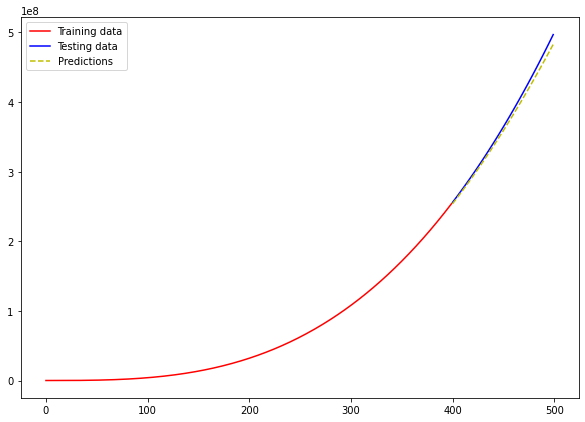

In [26]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_2)

# Upload callbacks to the tensorflow_hub

In [ ]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "Compare all model of task 1" \
  --description "Comparing all model of polynomial regression" \
  --one_shot

view tensorboard
https://tensorboard.dev/experiment/OzseqGVdQGqvole2EvNUjw/#scalars

In [28]:
# Check out experiments
!tensorboard dev list

2023-03-23 05:38:52.436222: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-23 05:38:52.436348: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-23 05:38:52.436369: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-03-23 05:38:53.812531: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to c